In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter

In [2]:
ds = xr.open_zarr("data_fig4S.zarr/")

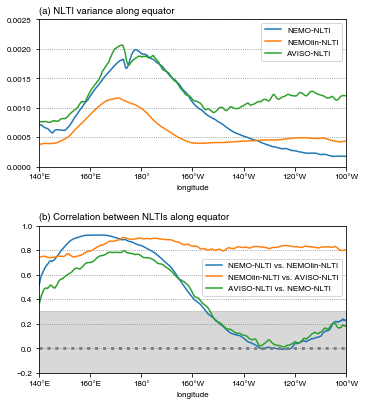

In [3]:
fig = plt.figure(figsize=(5.5,6.5))
plt.rcParams['font.size'] =8

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

ax1 = fig.add_subplot(211)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ds.nlti_nemo_var.plot(label='NEMO-NLTI');
ds.nlti_nemolin_var.plot(label='NEMOlin-NLTI');
ds.nlti_aviso_var.plot(label='AVISO-NLTI');
plt.legend()
plt.title('(a) NLTI variance along equator',loc='left')
plt.title('');
plt.xlim(140,260)
plt.ylim(0,0.0025)
plt.ylabel("");
plt.xlabel('longitude');
plt.grid(color='grey',linestyle = ':',axis='y')


ax2 = fig.add_subplot(212)
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ds.corr_nlti_nemo_nlti_nemolin.plot(label='NEMO-NLTI vs. NEMOlin-NLTI')
ds.corr_nlti_nemolin_nlti_aviso.plot(label='NEMOlin-NLTI vs. AVISO-NLTI')
ds.corr_nlti_aviso_nlti_nemo.plot(label='AVISO-NLTI vs. NEMO-NLTI')
plt.legend(loc=7,bbox_to_anchor=(1, 0.65))
plt.ylim(-0.2,1)
plt.xlim(140,260)
plt.ylabel("");
plt.xlabel('longitude');
plt.axhline(y=0., c="0.5", ls=":", lw=3)
plt.grid(color='grey',linestyle = ':',axis='y')
plt.subplots_adjust(wspace =0, hspace = 0.4)
plt.fill_between(
    ds.corr_nlti_aviso_nlti_nemo.lon,
    -0.30, 0.30,
    color='0.5', alpha=0.3,
)
plt.title('(b) Correlation between NLTIs along equator',loc='left')
plt.title('');

plt.savefig("figS4.pdf", format="pdf", bbox_inches="tight")
plt.show()